1 Practical Lab 1: Univariate Linear Regression on California Housing Prices
Author: Shiru Course: Machine Learning Foundations
Repository: https://github.com/SHIRU235/LinearRegression.git

2 Problem Statement
The goal of this lab is to train three univariate linear regression models to predict the median house value in California based on one independent variable at a time: median income, population, and number of households.

In [3]:
%pip install numpy pandas matplotlib seaborn scikit-learn

  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.15.3-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
Using cached matplotlib-3.10.3-cp313-


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
##3 Getting the data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Link to data
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
df = pd.read_csv(url)
print(df) 

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

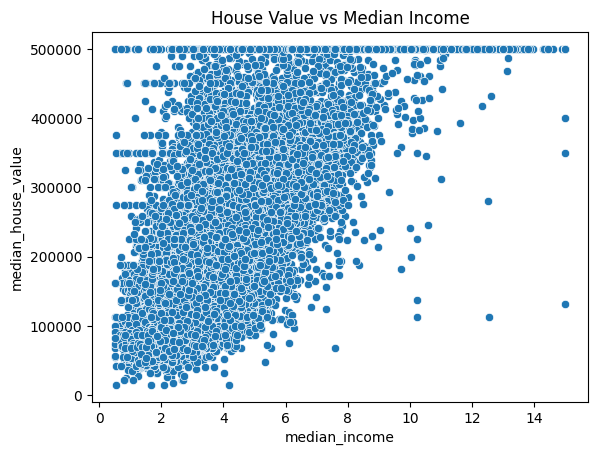

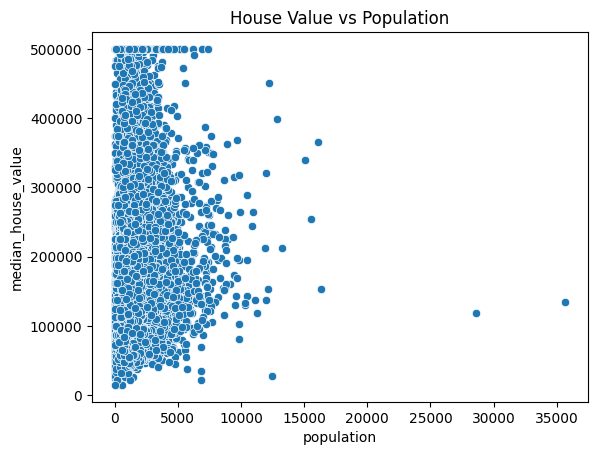

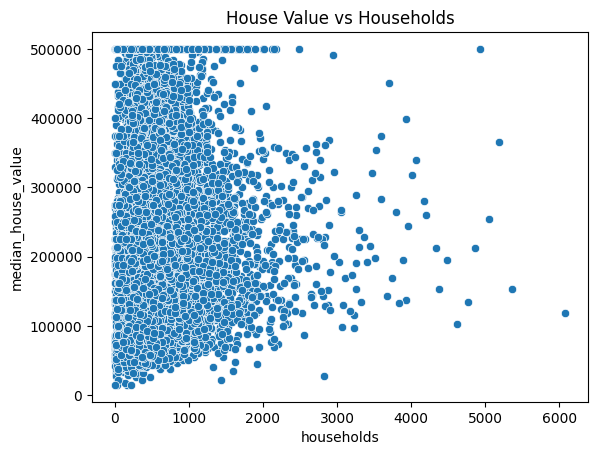

In [ ]:
#4EDA (Exploratory Data Analysis)
# Summary Statistics
df.describe()

# Scatter Plots
sns.scatterplot(data=df, x='median_income', y='median_house_value').set_title('House Value vs Median Income')
plt.show()

sns.scatterplot(data=df, x='population', y='median_house_value').set_title('House Value vs Population')
plt.show()

sns.scatterplot(data=df, x='households', y='median_house_value').set_title('House Value vs Households')
plt.show()

#Text based Insights
- There is a strong positive correlation between median_income and median_house_value.
- Population and households show weaker correlations.

In [6]:
# 5. Linear Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

def run_regression(X_col):
    X = df[[X_col]]
    y = df["median_house_value"]
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    intercept = model.intercept_
    slope = model.coef_[0]
    return intercept, slope, mse, mae, y_pred

results = {}
for feature in ['median_income', 'population', 'households']:
    results[feature] = run_regression(feature)

In [7]:
results = {}
predictions = {}

for feature in ['median_income', 'population', 'households']:
    intercept, slope, mse, mae, y_pred = run_regression(feature)
    results[feature] = [intercept, slope, mse, mae]  # only 4 values
    predictions[feature] = y_pred  # store predictions separately if needed later

In [8]:
# 6. Regression Table
table = pd.DataFrame(results, index=["Intercept", "Slope", "MSE", "MAE"]).T
table

,Intercept,Slope,MSE,MAE
median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
population,210436.262076,-2.511753,1.330741e+10,91153.820095
households,196928.577162,19.872775,1.325778e+10,90802.743243


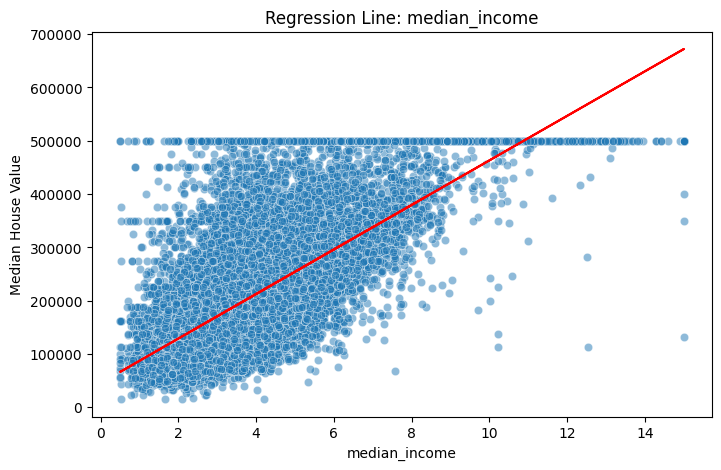

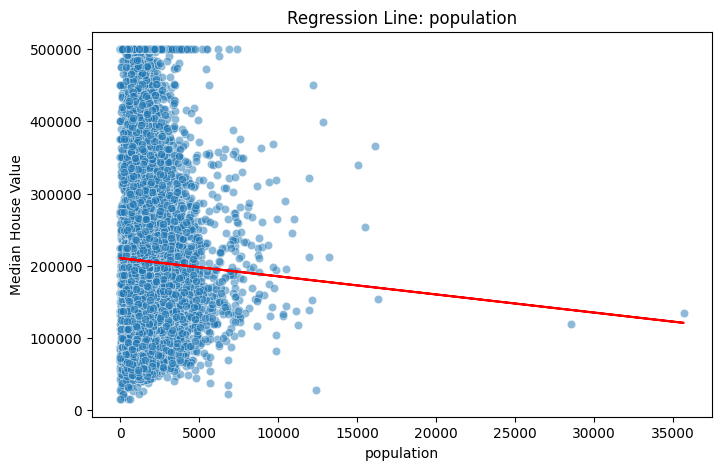

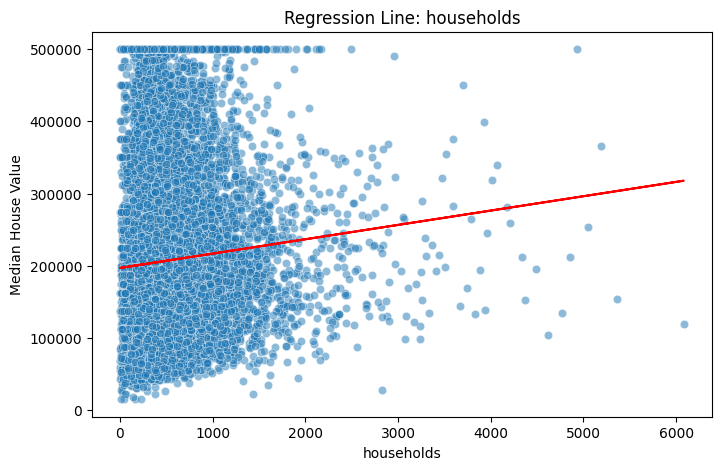

In [9]:
# Plot Regression Lines
import matplotlib.pyplot as plt
import seaborn as sns

for feature in ['median_income', 'population', 'households']:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[feature], y=df["median_house_value"], alpha=0.5)
    plt.plot(df[feature], predictions[feature], color='red')
    plt.title(f"Regression Line: {feature}")
    plt.xlabel(feature)
    plt.ylabel("Median House Value")
    plt.show()

## Summary & Recommendations

- **Median Income** is the best predictor among the three variables, with the lowest MSE and MAE.
- **Population** and **Households** have weak predictive power.
- recommend using **median income** as a key feature in future models.

The strong positive trend between income and house values confirms expected economic behavior: higher income regions have higher property values.